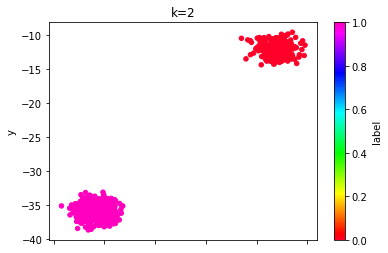

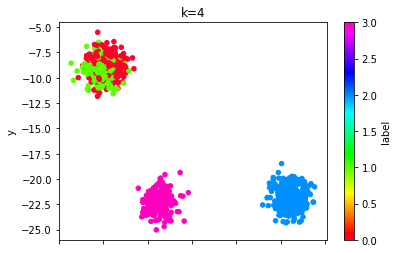

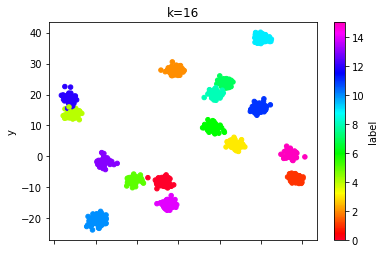

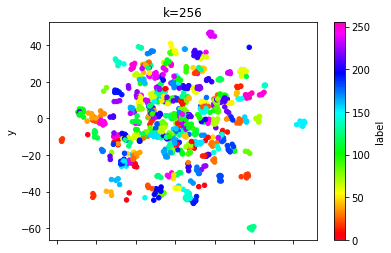

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tsd
import numpy as np
import pandas as pd

ks = [2, 4, 16, 256] # number of means of gaussians
prior_var = 20 # prior variance for means
sampling = 1000 # how many points to draw


for k in ks:
    theta = tsd.Dirichlet(np.ones(k)).sample(sample_shape=1) # mixture proportions
    mus = tsd.Normal(0, prior_var).sample(sample_shape=(k,2)) # mixture means
    z = tsd.Categorical(theta) # assignments' distribution
    assignment = tf.reshape(z.sample(sampling), shape=-1) # assingments
    mean = tf.gather(mus, assignment) # means corresponding to assignments
    x = tf.reshape(tsd.Normal(mean, 1).sample(1), shape=(sampling, -1)) # data
    # plotting
    df = pd.DataFrame(np.concatenate([x.numpy(), assignment.numpy().reshape(-1, 1)], axis=1), columns=['x', 'y', 'label'])
    df.plot.scatter('x', 'y', c='label', colormap='gist_rainbow', title="k=%d" %k )
